In [9]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [10]:
con = sqlite3.connect("results_plots_tables/results.db")
all_tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)
all_tables.index.name = 'table_id'
all_tables.columns = ['table_name']
all_tables

,table_name
table_id,
0,rmse_v4_final
1,violation_ratio_v4_final
2,dmw_test_v4_final
3,dmw_test_bool_v4_final
4,dmw_by_model_bool_v4_final


### RMSE

In [11]:
# Get the data
rmse_df = pd.read_sql_query("SELECT * FROM rmse_v4_final", con).set_index("index")
rmse_df.index.name = 'model'

In [12]:
# Export data to latex
rmse_df.to_latex("results_plots_tables/rmse_v5.tex", float_format="%.3f", index=True, escape=True)

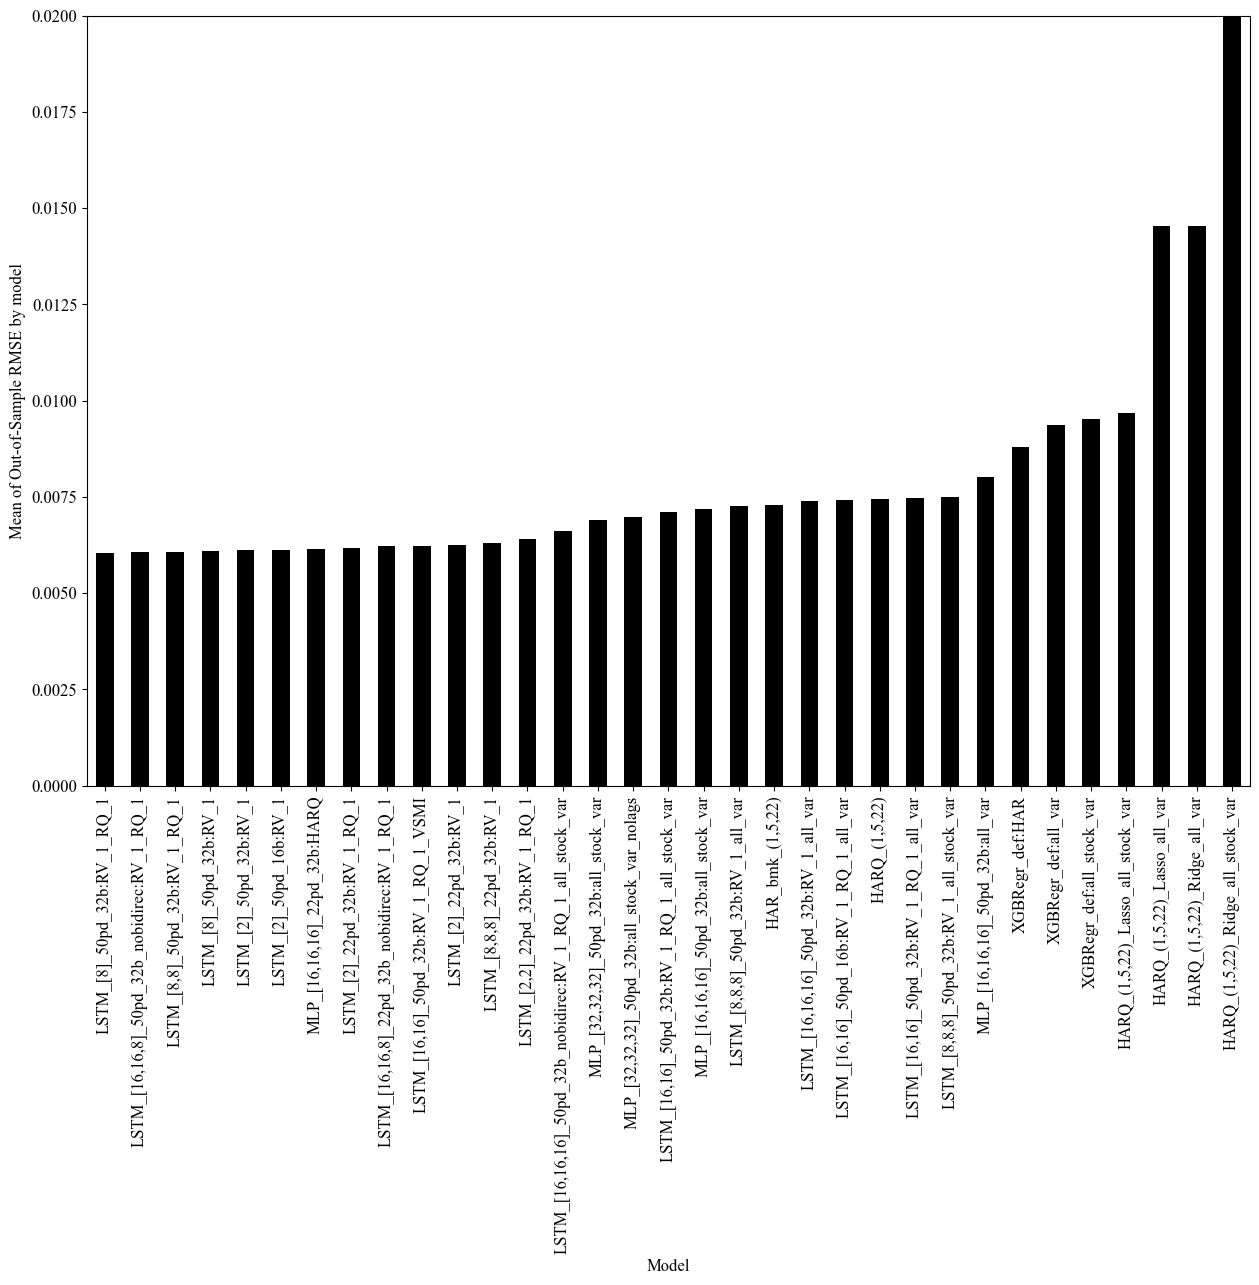

In [35]:
plt.rcParams["font.family"] = "Times New Roman"

ax = rmse_df.mean(axis=1).sort_values().plot(kind='bar', figsize=(15, 10), color='black')
ax.set_ylim(0, 0.02)
ax.set_ylabel("Mean of Out-of-Sample RMSE by model")
#ax.set_title("Mean of Out-of-Sample RMSE by model")
ax.set_xlabel("Model")
plt.savefig("results_plots_tables/rmse_by_model_mean.pdf", bbox_inches='tight')
plt.show()

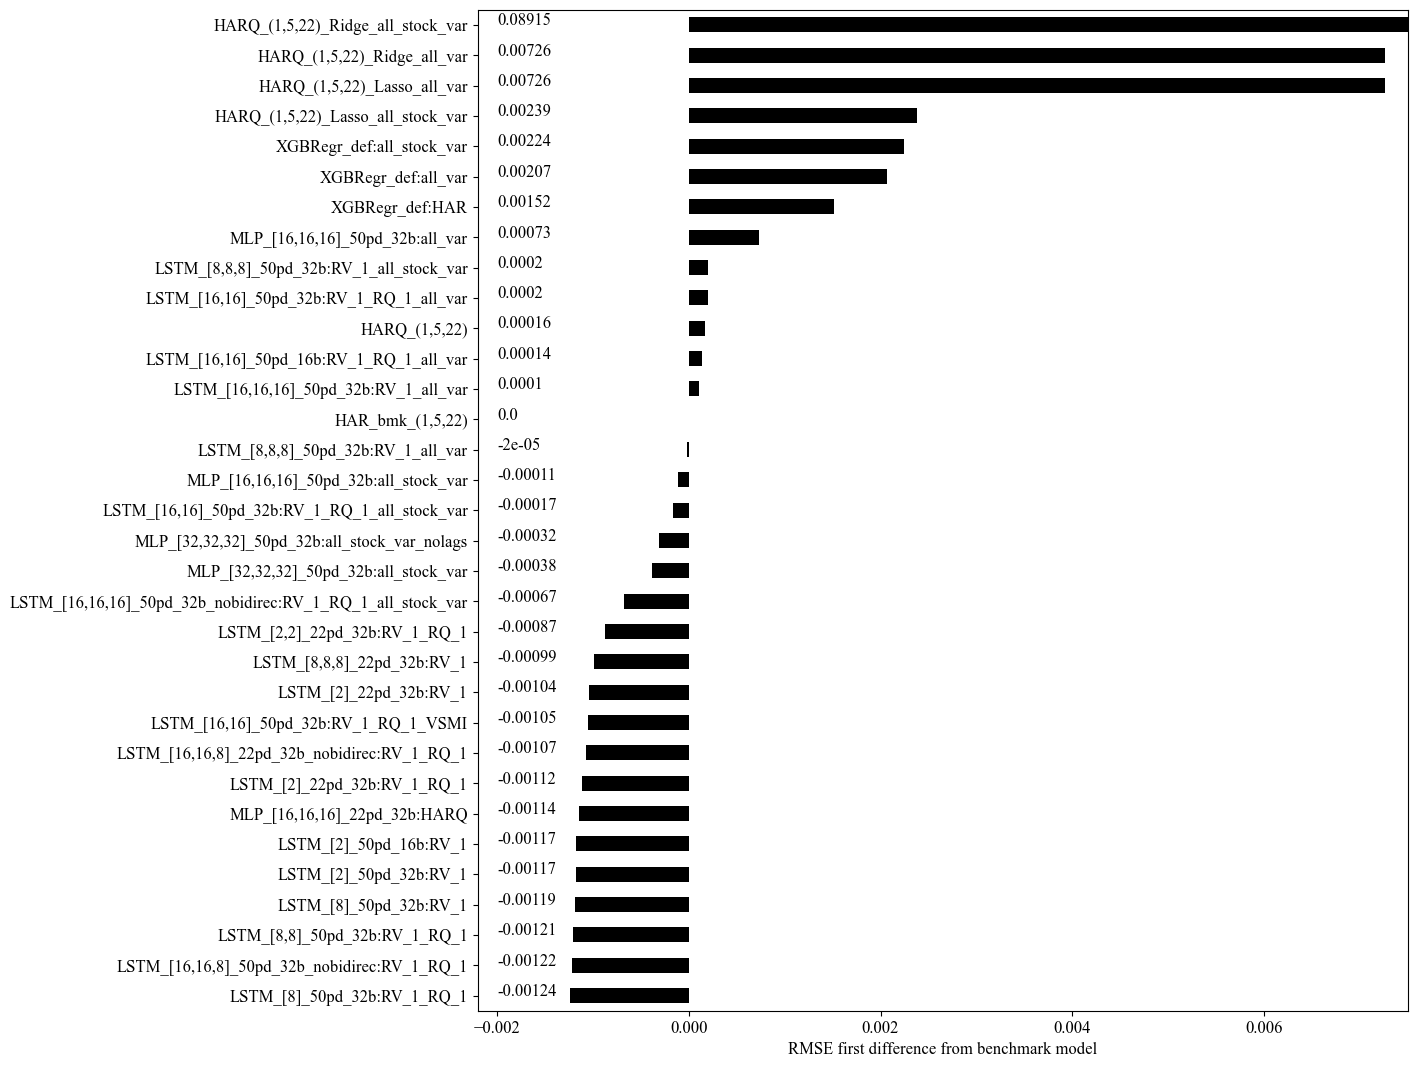

In [36]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

rmse_diff_df = rmse_df.sub(rmse_df.iloc[0])
ax = rmse_diff_df.mean(axis=1).sort_values().plot(kind='barh', figsize=(12, 13), color='black')
ax.set_xlim(-0.0022, 0.0075)
ax.set_xlabel("RMSE first difference from benchmark model")
#ax.set_title("RMSE difference from benchmark model")
ax.set_ylabel("")

# Insert values external to the graph
for i, v in enumerate(rmse_diff_df.mean(axis=1).sort_values()):
    ax.text(-0.002, i, str(round(v, 5)), color='black')

plt.show()

# Export figure
fig = ax.get_figure()   
fig.savefig('results_plots_tables/rmse_v5.pdf', bbox_inches='tight')

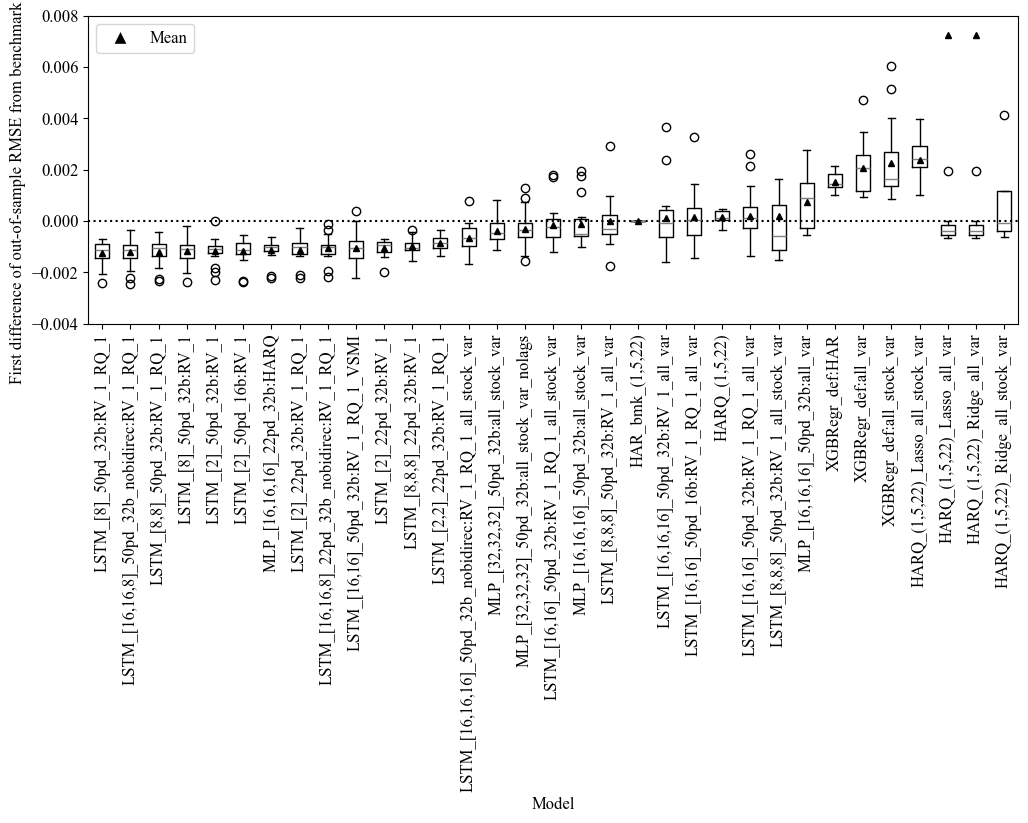

In [32]:
box_plot_temp = rmse_df.sub(rmse_df.iloc[0])
mean_values = box_plot_temp.T.mean().sort_values()
box_plot_temp = box_plot_temp.reindex(mean_values.index)
plt.figure(figsize=(12, 4))  # Set the dimensions of the plot
plt.boxplot(box_plot_temp.T, showmeans=True, meanprops=dict(marker='^', markerfacecolor='black', markeredgecolor='black', markersize=5), medianprops=dict(color="grey"))
plt.xticks(range(1, len(box_plot_temp.index) + 1), box_plot_temp.index, rotation=90)
plt.xlabel('Model')
plt.ylabel('First difference of out-of-sample RMSE from benchmark model')
#plt.title('Box Plot: Improvements in Out-of-Sample RMSE over Benchmark Model')
plt.ylim(-0.004, 0.008)  # Set the y-axis limits

# Set the legend for mean
mean_legend = plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', markersize=10, label='Mean')
plt.legend(handles=[mean_legend])

# Plot horizontal dotted line at level 0
plt.axhline(y=0, color='black', linestyle='dotted')

plt.savefig('results_plots_tables/box_plot_rmse.pdf', bbox_inches='tight')  # Save the plot as 'box_plot.png'
plt.show()


<Axes: ylabel='model'>

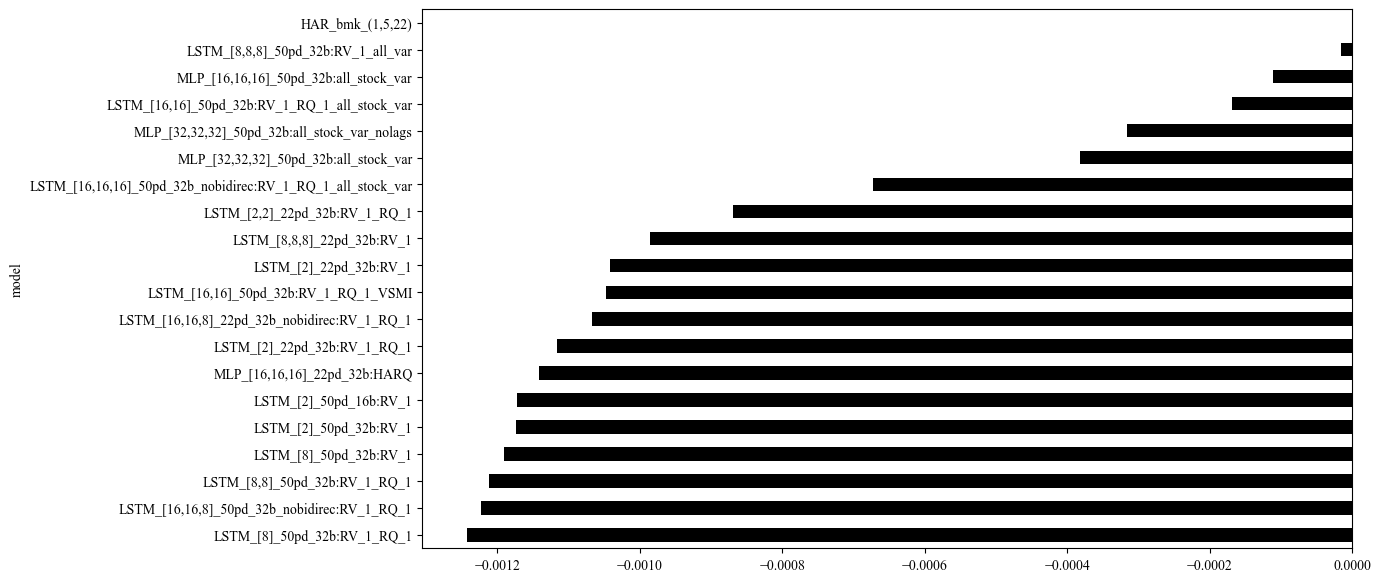

In [173]:
mean_values.head(20).plot(kind='barh', figsize=(12, 7), color='black')

### Diebold, Mariano and West test (DMW)

In [65]:
# Get the data
dmw_test_df = pd.read_sql_query("SELECT * FROM dmw_test_v4_final", con).set_index("index")
dmw_test_df.index.name = 'model'

In [70]:
#split table 
dmw_test_df_1 = dmw_test_df.iloc[:, 0:18]
dmw_test_df_2 = dmw_test_df.iloc[:, 18:-1]

# Export data to latex
dmw_test_df_1.to_latex("results_plots_tables/dmw_test_v5_1.tex", float_format="%.3f", index=True, escape=True)
dmw_test_df_2.to_latex("results_plots_tables/dmw_test_v5_2.tex", float_format="%.3f", index=True, escape=True)

In [74]:
dmw_bool_df = pd.read_sql_query("SELECT * FROM dmw_test_bool_v4_final", con).set_index("index")
dmw_bool_df.index.name = 'model'

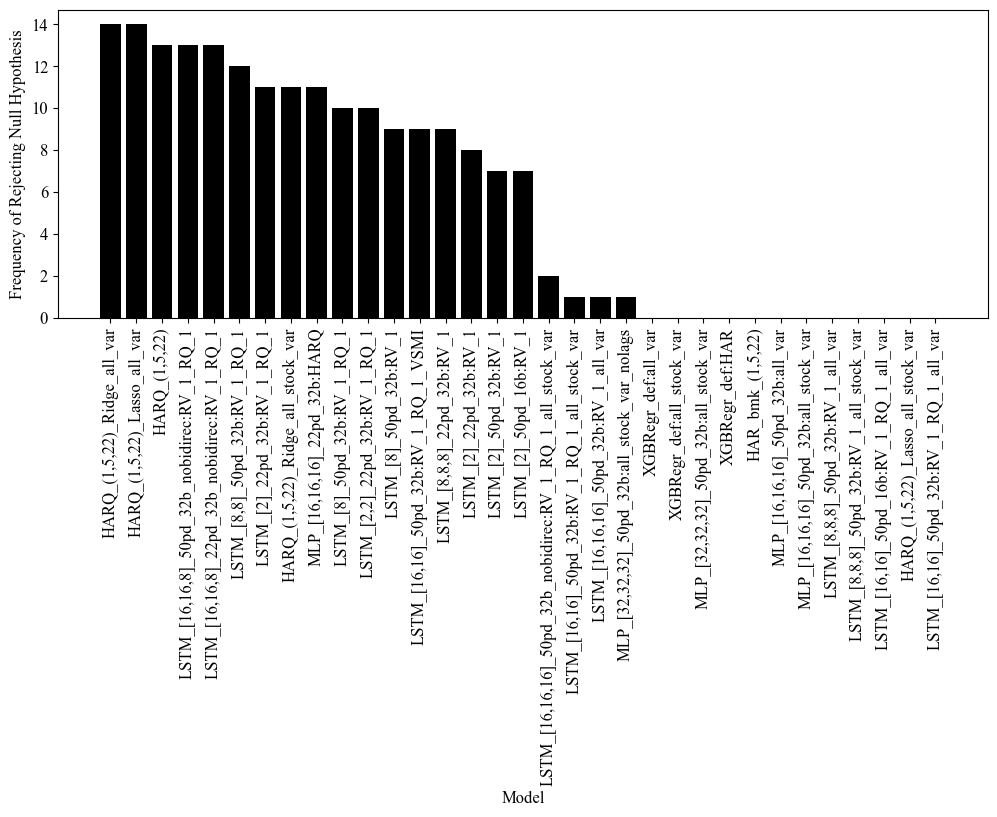

In [30]:
dmw_bool_results_df = pd.read_sql_query("SELECT * FROM dmw_by_model_bool_v4_final", con).set_index("index")
dmw_bool_results_df.index.name = 'model'
dmw_bool_results_df.columns = ['freq_reject']
dmw_bool_results_df = dmw_bool_results_df.sort_values(by='freq_reject', ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(dmw_bool_results_df.index, dmw_bool_results_df['freq_reject'], color='black')
plt.xlabel('Model')
plt.ylabel('Frequency of Rejecting Null Hypothesis')
#plt.title('DMW Test Results')
plt.xticks(rotation=90)
plt.savefig('results_plots_tables/dmw_test_results.pdf', bbox_inches='tight')
plt.show()


### Value at Risk - Violation Ratio

In [19]:
violation_ratio = pd.read_sql_query("SELECT * FROM violation_ratio_v4_final", con).set_index("index")
violation_ratio.index.name = 'model'
violation_ratio.to_latex("results_plots_tables/violation_ratio_v5.tex", float_format="%.3f", index=True, escape=True)

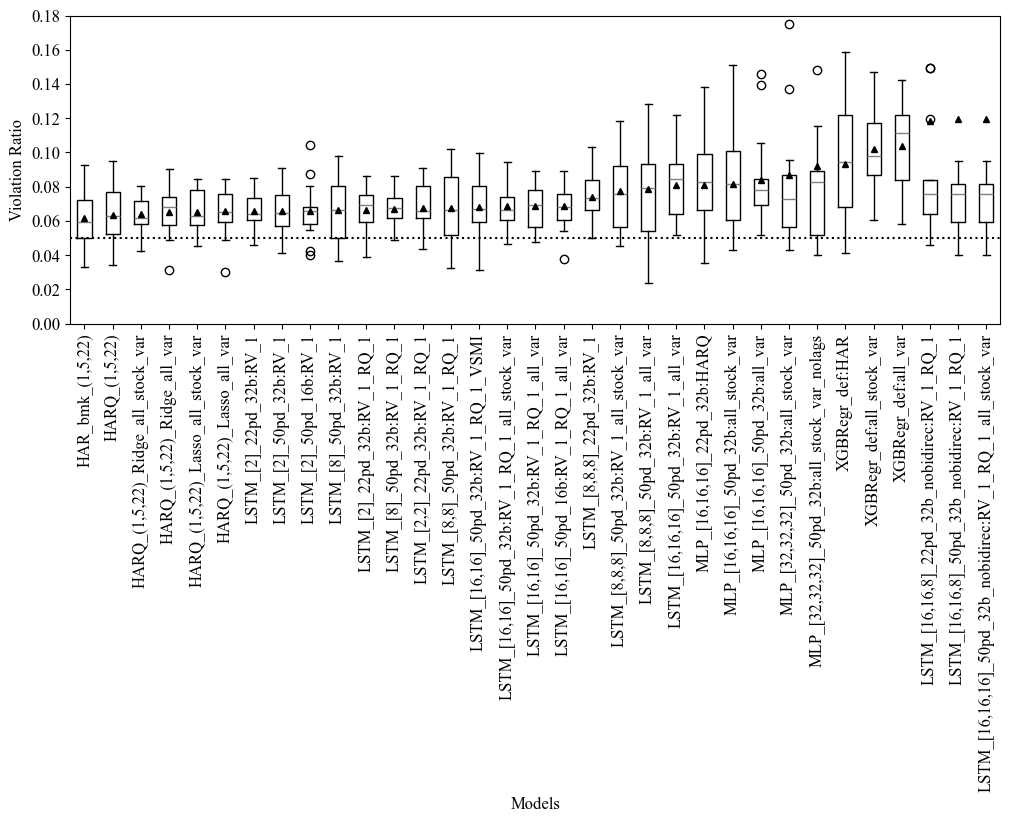

In [31]:
mean_values = violation_ratio.T.mean().sort_values()
box_plot_vr_temp = violation_ratio.reindex(mean_values.index)

plt.figure(figsize=(12, 4))  # Set the dimensions of the plot
plt.boxplot(box_plot_vr_temp.T, showmeans=True, meanprops=dict(marker='^', markerfacecolor='black', markeredgecolor='black', markersize=5), medianprops=dict(color="grey"))
plt.xticks(range(1, len(violation_ratio.index) + 1), violation_ratio.index, rotation=90)
plt.xlabel('Models')
plt.ylabel('Violation Ratio')
#plt.title('Boxplot of Violation Ratio by Model (Ordered by Mean)')
plt.ylim(0, 0.18)
plt.axhline(y=0.05, color='black', linestyle='dotted')
plt.xticks(rotation=90)
plt.savefig('results_plots_tables/box_plot_vr_by_model.pdf', bbox_inches='tight')
plt.show()

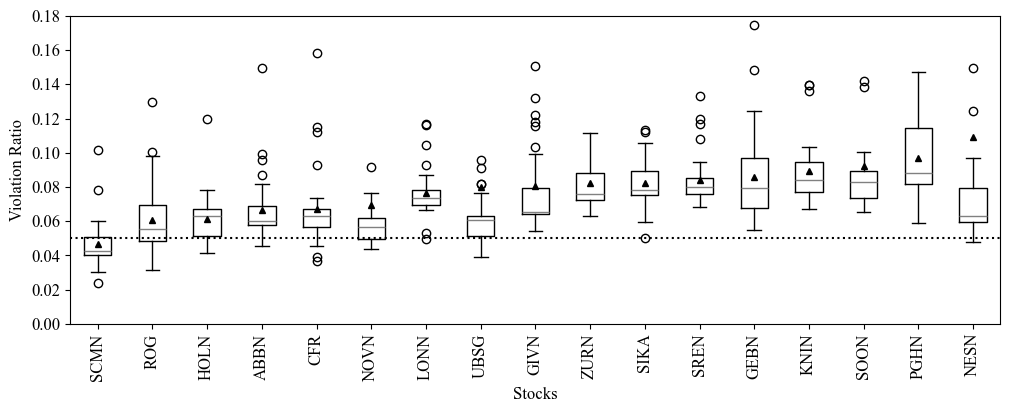

In [34]:
mean_values = violation_ratio.mean().sort_values()
box_plot_vr_temp = violation_ratio.T.reindex(mean_values.index)

plt.figure(figsize=(12, 4))  # Set the dimensions of the plot
plt.boxplot(box_plot_vr_temp.T, showmeans=True, meanprops=dict(marker='^', markerfacecolor='black', markeredgecolor='black', markersize=5), medianprops=dict(color="grey"))
plt.xticks(range(1, len(mean_values.index) + 1), mean_values.index, rotation=90)
plt.xlabel('Stocks')
plt.ylabel('Violation Ratio')
#plt.title('Boxplot of Violation Ratio by Stock (Ordered by Mean)')
plt.ylim(0, 0.18)
plt.axhline(y=0.05, color='black', linestyle='dotted')
plt.xticks(rotation=90)
plt.savefig('results_plots_tables/box_plot_vr_by_stock.pdf', bbox_inches='tight')
plt.show()